## Codsoft
### Task 3 : IRIS FLOWER CLASSIFICATION
### Author : Sathwik S M
#### Batch : JUNE BATCH A55
#### Domain : Data science

####  Aim : Train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into
#### their respective species.

#### Importing necessary Librabies

In [28]:
import pandas as pd #data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #data visulaization
from sklearn.model_selection import train_test_split #for training and testing the dataset
from sklearn.neighbors import KNeighborsClassifier # K-nearest algorithm
from sklearn import metrics #for checking the accuracy score
from sklearn.metrics import classification_report # for calculating the classification report 
import warnings
warnings.filterwarnings('ignore')

#### Loading the data set

In [35]:
#load the data set using pandas
df_iris_flower=pd.read_csv("C:\\Users\\nithi\\OneDrive\\Documents\\Nisarga\\IRIS.csv")
#first 10 elements of the row
df_iris_flower.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df_iris_flower.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# Total number of rows and columns
df_iris_flower.shape

(150, 5)

##### basic information - There are 150 rows and 5 columns

In [5]:
# information of the data set
df_iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df_iris_flower['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

##### basic observation There are 3 unique species 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

In [7]:
# statiscal information of the dataset
df_iris_flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### basic observation
###### the average sepal_length is 5.84 and average sepal_width is 3.05 
###### the average petal_width is 3.75 and average petal_width is 1.19
###### the maximum sepal_length and minimum sepal_length is 7.9 and 4.3 respectively
###### the maximum sepal_width and minimum sepal_width is 4.4 and 2 respectively
###### the maximum petal_length and minimum petal_legth is 6.9 and 3.75 respectively
###### the maximum petal_width and minimum petal_width is 2.5 and 0.1 respectively

#### checking for any null values

In [8]:
df_iris_flower.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### checking for any duplicate values

In [9]:
df_iris_flower.duplicated().sum()

3

In [10]:
df_iris_flower[df_iris_flower.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [11]:
df_iris_flower.drop_duplicates(inplace=True)

In [12]:
df_iris_flower[df_iris_flower.duplicated()].sum()

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

#### Exploratory Data analysis

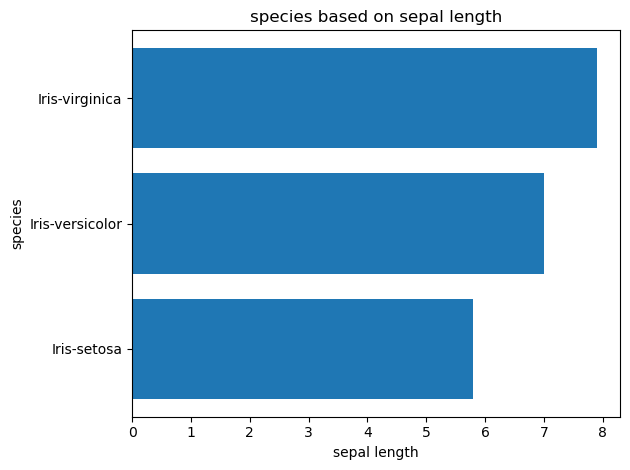

In [13]:
plt.barh(df_iris_flower['species'],df_iris_flower['sepal_length'])
plt.title('species based on sepal length')
plt.xlabel('sepal length')
plt.ylabel('species')
plt.tight_layout()


#### basic observation 
#### The sepal length of Iris-setosa are almost 6 which can be less than 6
#### The sepal length of Iris-versicolor are exaclty 7 which can be less than 7
#### the sepal length of Iris-viriginca are almost 8 which can be less than 8


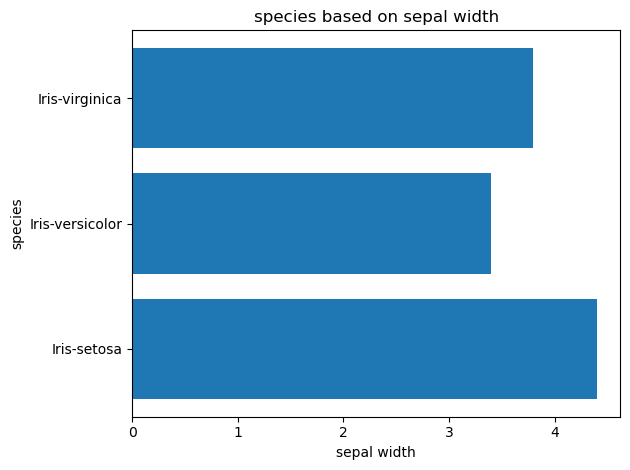

In [14]:
plt.barh(df_iris_flower['species'],df_iris_flower['sepal_width'])
plt.title('species based on sepal width')
plt.xlabel('sepal width')
plt.ylabel('species')
plt.tight_layout()

#### basic observation 
#### The sepal width of Iris-setosa are less than 5
#### The sepal width of Iris-versicolor are less than 4
#### the sepal width of Iris-viriginca are almost  4

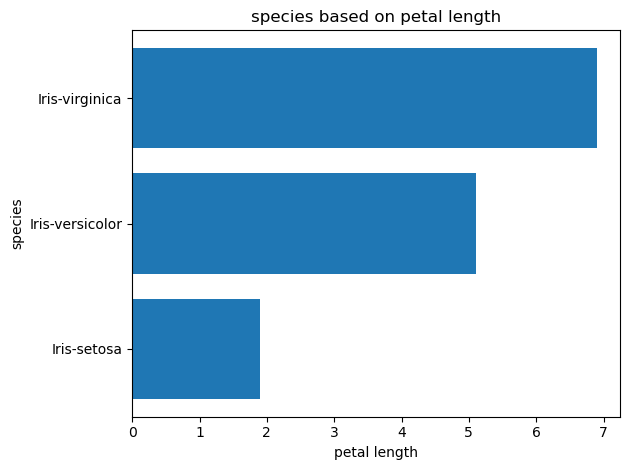

In [15]:
plt.barh(df_iris_flower['species'],df_iris_flower['petal_length'])
plt.title('species based on petal length')
plt.xlabel('petal length')
plt.ylabel('species')
plt.tight_layout()

#### basic observation 
#### The petal length of Iris-setosa falls under  atmost 2 which can be less than 2
#### The petal length of Iris-versicolor falls under atleast 5 which can be less than 6
#### the petal length of Iris-viriginca falls under almost 7 which can be less than 7

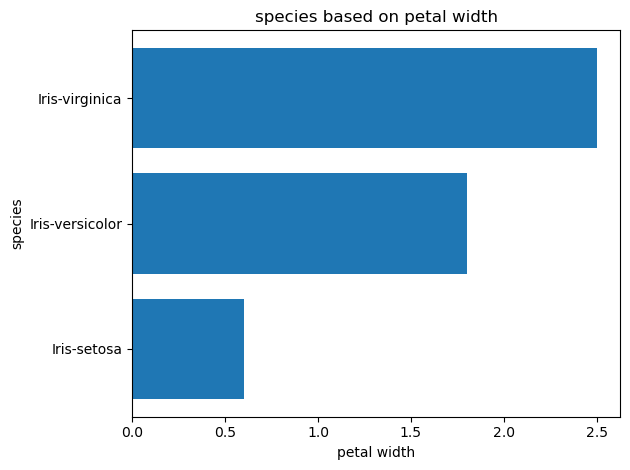

In [16]:
plt.barh(df_iris_flower['species'],df_iris_flower['petal_width'])
plt.title('species based on petal width')
plt.xlabel('petal width')
plt.ylabel('species')
plt.tight_layout()

#### basic observation 
#### The petal width of Iris-setosa falls under  atleast 0.5 which can be less than 0.5
#### The petal width of Iris-versicolor falls under less than 2 which can be less than 2
#### the petal width of Iris-viriginca falls under less than 2.5 which can be less than 2.5

## Model Building

#### split the data into train and test

In [17]:
X=df_iris_flower.drop('species',axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
Y=df_iris_flower[['species']]
Y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


### Model training

In [19]:
df_iris_x_train,df_iris_x_test,df_iris_y_train,df_iris_y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [20]:
df_knn_model=KNeighborsClassifier(n_neighbors=2)
df_knn_model.fit(df_iris_x_train,df_iris_y_train)

KNeighborsClassifier(n_neighbors=2)

### Model Evalution

#### trained data

In [21]:
df_iris_flower_training_prediction=df_knn_model.predict(df_iris_x_train)
df_iris_flower_training_prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-ve

#### calculating the accurancy score

In [22]:
iris_accurancy_score=metrics.accuracy_score(df_iris_y_train,df_iris_flower_training_prediction)
print("accurancy score : ",iris_accurancy_score)

accurancy score :  0.9743589743589743


#### test data

In [23]:
df_iris_flower_testing_prediction=df_knn_model.predict(df_iris_x_test)
df_iris_flower_testing_prediction

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [24]:
# accurancy score
iris_accurancy_score_1=metrics.accuracy_score(df_iris_y_test,df_iris_flower_testing_prediction)
print('Accurancy sccore : ',iris_accurancy_score_1)

Accurancy sccore :  1.0


#### testing prediction

In [25]:
new_value=pd.DataFrame({'sepal_length':[6.7],'sepal_width':3.7,'petal_length':5.2,'petal_width':2.3})

In [26]:
iris_species_predict=df_knn_model.predict(new_value)

In [27]:
iris_species_predict

array(['Iris-virginica'], dtype=object)

### Classification report 

In [30]:
Classification_Report=classification_report(df_iris_y_test,df_iris_flower_testing_prediction)
print(Classification_Report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### This is the result of My MODEL 